In [71]:
# https://data.world/aroissues/forbes-global-2000-2008-2019

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
first_year = 2008
last_year = 2019
forbes_data = {}

for year in range(first_year, last_year + 1):
    file_name = 'Forbes Global 2000 - ' + str(year) + '.csv'
    df = pd.read_csv(file_name)
    forbes_data[year] = df

In [74]:
cols = {}

for year, df in forbes_data.items():
    for col in df.columns:
        if col in cols:
            cols[col] += 1
        else:
            cols[col] = 1

cols

{'Assets': 11,
 'Assets ($bil)': 1,
 'CEO': 5,
 'Company': 12,
 'Continent': 6,
 'Country': 12,
 'Forbes Webpage': 9,
 'Headquarters': 5,
 'Industry': 12,
 'Market Value': 11,
 'Market Value ($bil)': 1,
 'Profits': 11,
 'Profits ($bil)': 1,
 'Profits as % of Assets': 11,
 'Profits as % of Revenue': 5,
 'Profits as % of Sales': 6,
 'Rank': 12,
 'Revenue': 5,
 'Sales': 6,
 'Sales ($bil)': 1,
 'Sector': 6,
 'State': 5}

In [75]:
industry_sector_map = {
                        'Advertising': 'Consumer Discretionary',
                        'Apparel/Accessories': 'Consumer Discretionary',
                        'Apparel/Footwear Retail': 'Consumer Discretionary',
                        'Auto & Truck Manufacturers': 'Consumer Discretionary',
                        'Auto & Truck Parts': 'Consumer Discretionary',
                        'Broadcasting & Cable': 'Consumer Discretionary',
                        'Business & Personal Services': 'Consumer Discretionary',
                        'Casinos & Gaming': 'Consumer Discretionary',
                        'Consumer Electronics': 'Consumer Discretionary',
                        'Department Stores': 'Consumer Discretionary',
                        'Discount Stores': 'Consumer Discretionary',
                        'Furniture & Fixtures': 'Consumer Discretionary',
                        'Home Improvement Retail': 'Consumer Discretionary',
                        'Hotels & Motels': 'Consumer Discretionary',
                        'Household Appliances': 'Consumer Discretionary',
                        'Internet & Catalog Retail': 'Consumer Discretionary',
                        'Printing & Publishing': 'Consumer Discretionary',
                        'Recreational Products': 'Consumer Discretionary',
                        'Restaurants': 'Consumer Discretionary',
                        'Specialty Stores': 'Consumer Discretionary',
                        'Beverages': 'Consumer Staples',
                        'Drug Retail': 'Consumer Staples',
                        'Food Processing': 'Consumer Staples',
                        'Food Retail': 'Consumer Staples',
                        'Household/Personal Care': 'Consumer Staples',
                        'Tobacco': 'Consumer Staples',
                        'Oil & Gas Operations': 'Energy',
                        'Oil Services & Equipment': 'Energy',
                        'Consumer Financial Services': 'Financials',
                        'Diversified Insurance': 'Financials',
                        'Insurance Brokers': 'Financials',
                        'Investment Services': 'Financials',
                        'Life & Health Insurance': 'Financials',
                        'Major Banks': 'Financials',
                        'Property & Casualty Insurance': 'Financials',
                        'Real Estate': 'Financials',
                        'Regional Banks': 'Financials',
                        'Rental & Leasing': 'Financials',
                        'Thrifts & Mortgage Finance': 'Financials',
                        'Biotechs': 'Health Care',
                        'Healthcare Services': 'Health Care',
                        'Managed Health Care': 'Health Care',
                        'Medical Equipment & Supplies': 'Health Care',
                        'Pharmaceuticals': 'Health Care',
                        'Aerospace & Defense': 'Industrials',
                        'Air Courier': 'Industrials',
                        'Airline': 'Industrials',
                        'Business Products & Supplies': 'Industrials',
                        'Conglomerates': 'Industrials',
                        'Construction Services': 'Industrials',
                        'Electrical Equipment': 'Industrials',
                        'Environmental & Waste': 'Industrials',
                        'Heavy Equipment': 'Industrials',
                        'Other Industrial Equipment': 'Industrials',
                        'Other Transportation': 'Industrials',
                        'Railroads': 'Industrials',
                        'Security Systems': 'Industrials',
                        'Trading Companies': 'Industrials',
                        'Trucking': 'Industrials',
                        'Communications Equipment': 'Information Technology',
                        'Computer & Electronics Retail': 'Information Technology',
                        'Computer Hardware': 'Information Technology',
                        'Computer Services': 'Information Technology',
                        'Computer Storage Devices': 'Information Technology',
                        'Electronics': 'Information Technology',
                        'Semiconductors': 'Information Technology',
                        'Software & Programming': 'Information Technology',
                        'Aluminum': 'Materials',
                        'Construction Materials': 'Materials',
                        'Containers & Packaging': 'Materials',
                        'Diversified Chemicals': 'Materials',
                        'Diversified Metals & Mining': 'Materials',
                        'Forest Products': 'Materials',
                        'Iron & Steel': 'Materials',
                        'Paper & Paper Products': 'Materials',
                        'Specialized Chemicals': 'Materials',
                        'Apparel-Accessories': 'Consumer Discretionary',
                        'Apparel-Footwear Retail': 'Consumer Discretionary',
                        'Banking': 'Financials',
                        'Business Services & Supplies': 'Industrials',
                        'Capital Goods': 'Financials',
                        'Chemicals': 'Materials',
                        'Construction': 'Industrials',
                        'Consumer Durables': 'Consumer Staples',
                        'Diversified Financials': 'Financials',
                        'Diversified Utilities': 'Utilities',
                        'Drugs & Biotechnology': 'Health Care',
                        'Electric Utilities': 'Utilities',
                        'Food Drink & Tobacco': 'Consumer Staples',
                        'Food Markets': 'Consumer Staples',
                        'Food, Drink & Tobacco': 'Consumer Staples',
                        'Health Care Equipment & Svcs': 'Health Care',
                        'Hotels, Restaurants & Leisure': 'Consumer Discretionary',
                        'Household & Personal Products': 'Consumer Staples',
                        'Household-Personal Care': 'Consumer Staples',
                        'Insurance': 'Financials',
                        'Materials': 'Materials',
                        'Media': 'Telecommunication Services',
                        'Natural Gas Utilities': 'Utilities',
                        'Other Tranportation': 'Industrials',
                        'Precision Healthcare Equipment': 'Health Care',
                        'Retailing': 'Consumer Staples',
                        'Software & Services': 'Information Technology',
                        'Technology Hardware & Equip': 'Information Technology',
                        'Telecommunications Services': 'Telecommunication Services',
                        'Telecommunications services': 'Telecommunication Services',
                        'Transportation': 'Industrials',
                        'Utilities': 'Utilities'}

In [76]:
common_columns = ['Company', 'Market Value', 'Country', 'Rank',
                  'Revenue', 'Profits', 'Assets', 'Sector', 'Industry', 'Year']

forbes_data_clean_list = []

for year, df in forbes_data.items():
    
    if 'Sector' not in df.columns:
        df['Sector'] = df['Industry'].map(industry_sector_map)
    
    df.rename(columns={'Assets ($bil)': 'Assets', 
                       'Profits ($bil)': 'Profits',
                       'Market Value ($bil)': 'Market Value',
                       'Sales': 'Revenue',
                       'Sales ($bil)': 'Revenue'}, inplace = True)

    df['Year'] = year
    
    forbes_data_clean_list.append(df[common_columns])

forbes_clean = pd.concat(forbes_data_clean_list, sort=False)

In [77]:
sectors_by_year = forbes_clean.pivot_table(index=['Company'],
                                           columns=['Year'],
                                           values=['Sector'],
                                           aggfunc='first')

In [78]:
sectors_by_year['last'] = sectors_by_year.apply(lambda x: x.dropna()[-1], axis=1)
company_sector_map = sectors_by_year['last'].to_dict()

In [79]:
forbes_clean['Original Sector'] = forbes_clean['Sector']
forbes_clean['Sector'] = forbes_clean['Company'].map(company_sector_map)

In [80]:
top_countries = ['China', 'United States']
forbes_clean['Country Group'] = forbes_clean['Country']\
    .map(lambda x: x if x in top_countries else 'Other')

In [81]:
forbes_countries = pd.pivot_table(forbes_clean,
                                  index=['Country Group'],
                                  columns=['Year'],
                                  values=['Market Value'],
                                  aggfunc=np.sum)\
                     .fillna(0)

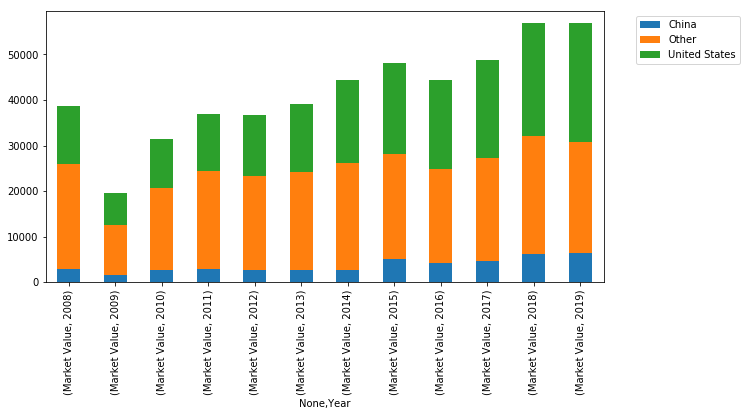

In [82]:
forbes_countries.T.plot(kind='bar', stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [83]:
forbes_sectors = pd.pivot_table(forbes_clean,
                                index=['Sector'],
                                columns=['Year'],
                                values=['Market Value'],
                                aggfunc=np.sum)\
                   .fillna(0)

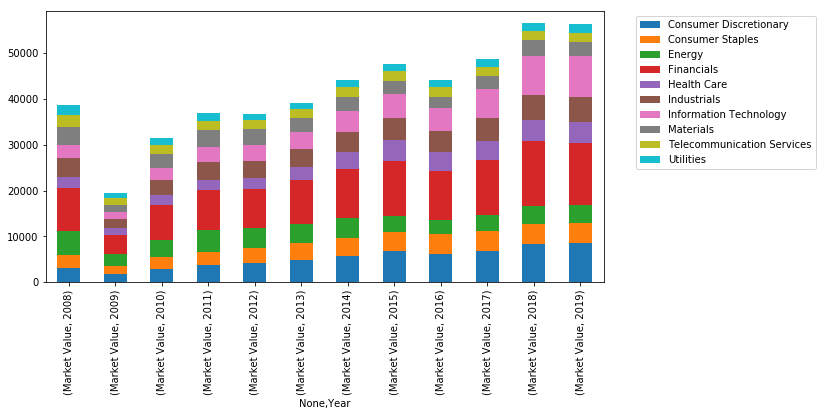

In [84]:
forbes_sectors.T.plot(kind='bar', stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')